# Body Fat Prediction Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#### Reading Data

In [2]:
notebook_path = os.path.abspath("BodyFatLinearRegression.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "Input\\bodyfat.csv")
df = pd.read_csv(path)

In [3]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


#### Data Cleaning

In [4]:
df = df.drop_duplicates()
df.duplicated().values.any()

False

In [5]:
df = df.fillna(method="ffill")
pd.isnull(df).any()

Density    False
BodyFat    False
Age        False
Weight     False
Height     False
Neck       False
Chest      False
Abdomen    False
Hip        False
Thigh      False
Knee       False
Ankle      False
Biceps     False
Forearm    False
Wrist      False
dtype: bool

#### Data Visualization

In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 31.5 KB


In [8]:
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

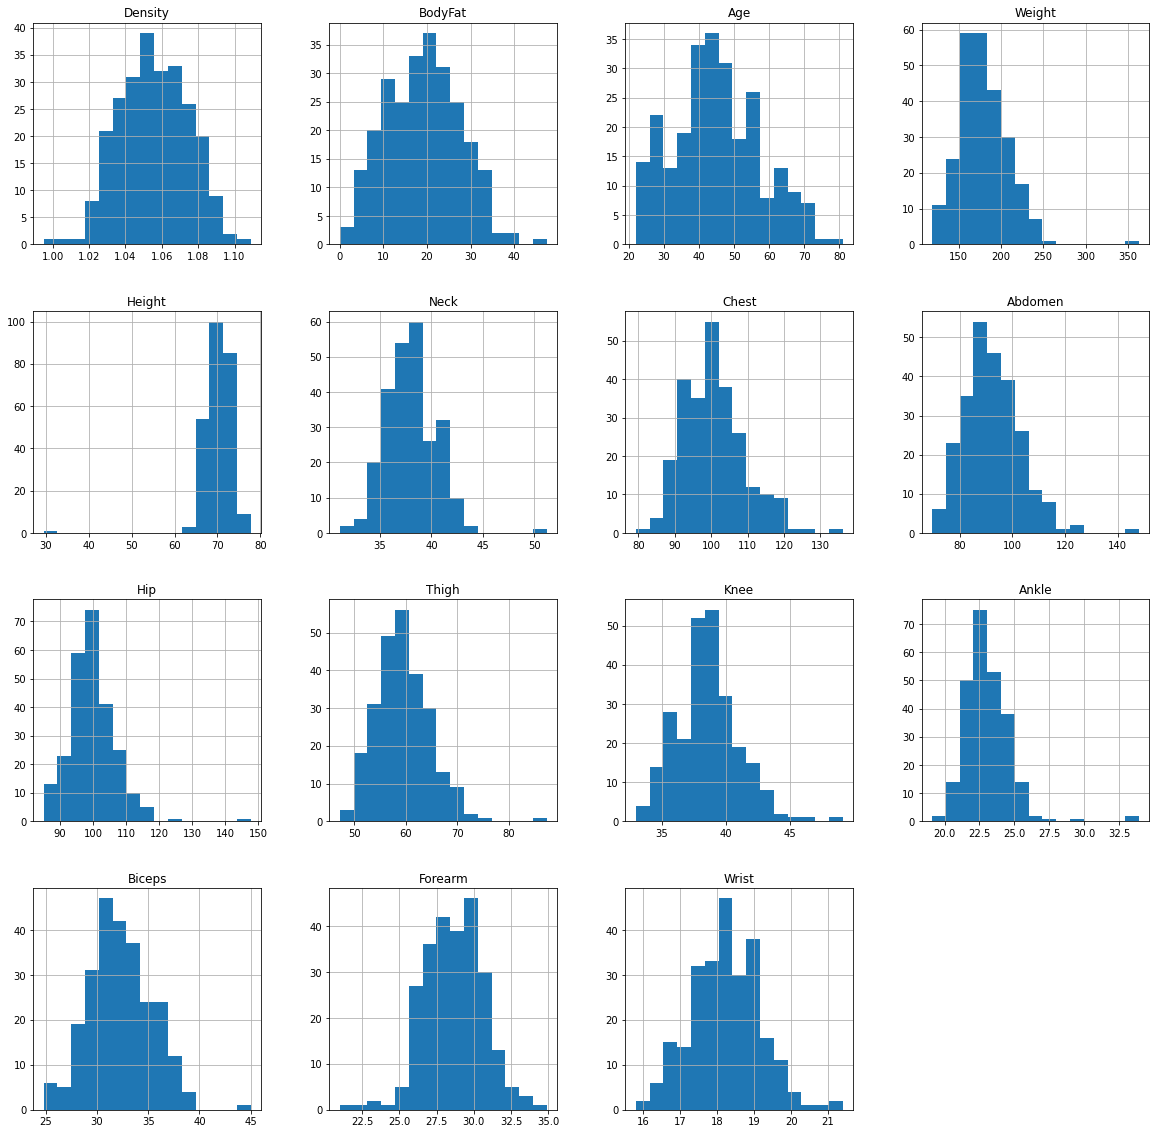

In [9]:
df.hist(bins=15, figsize=(20,20))
plt.show()

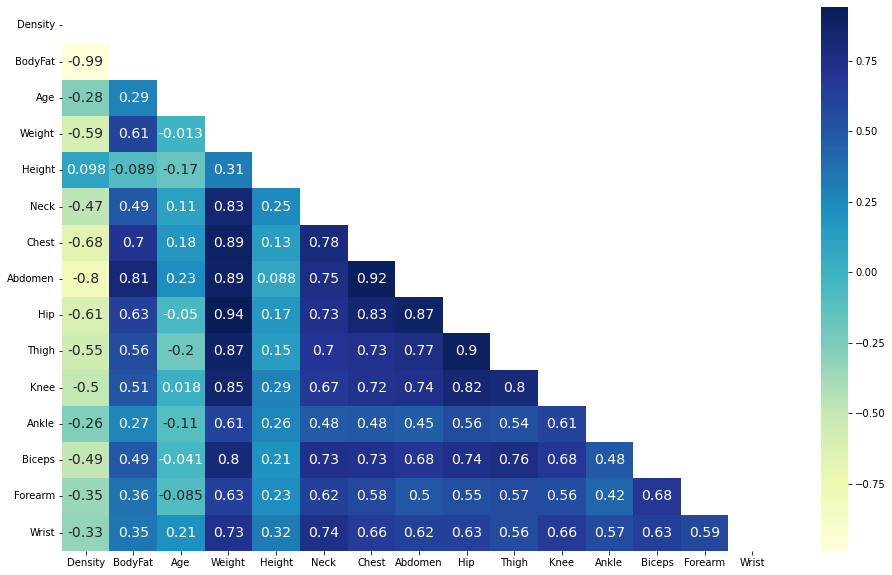

In [10]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

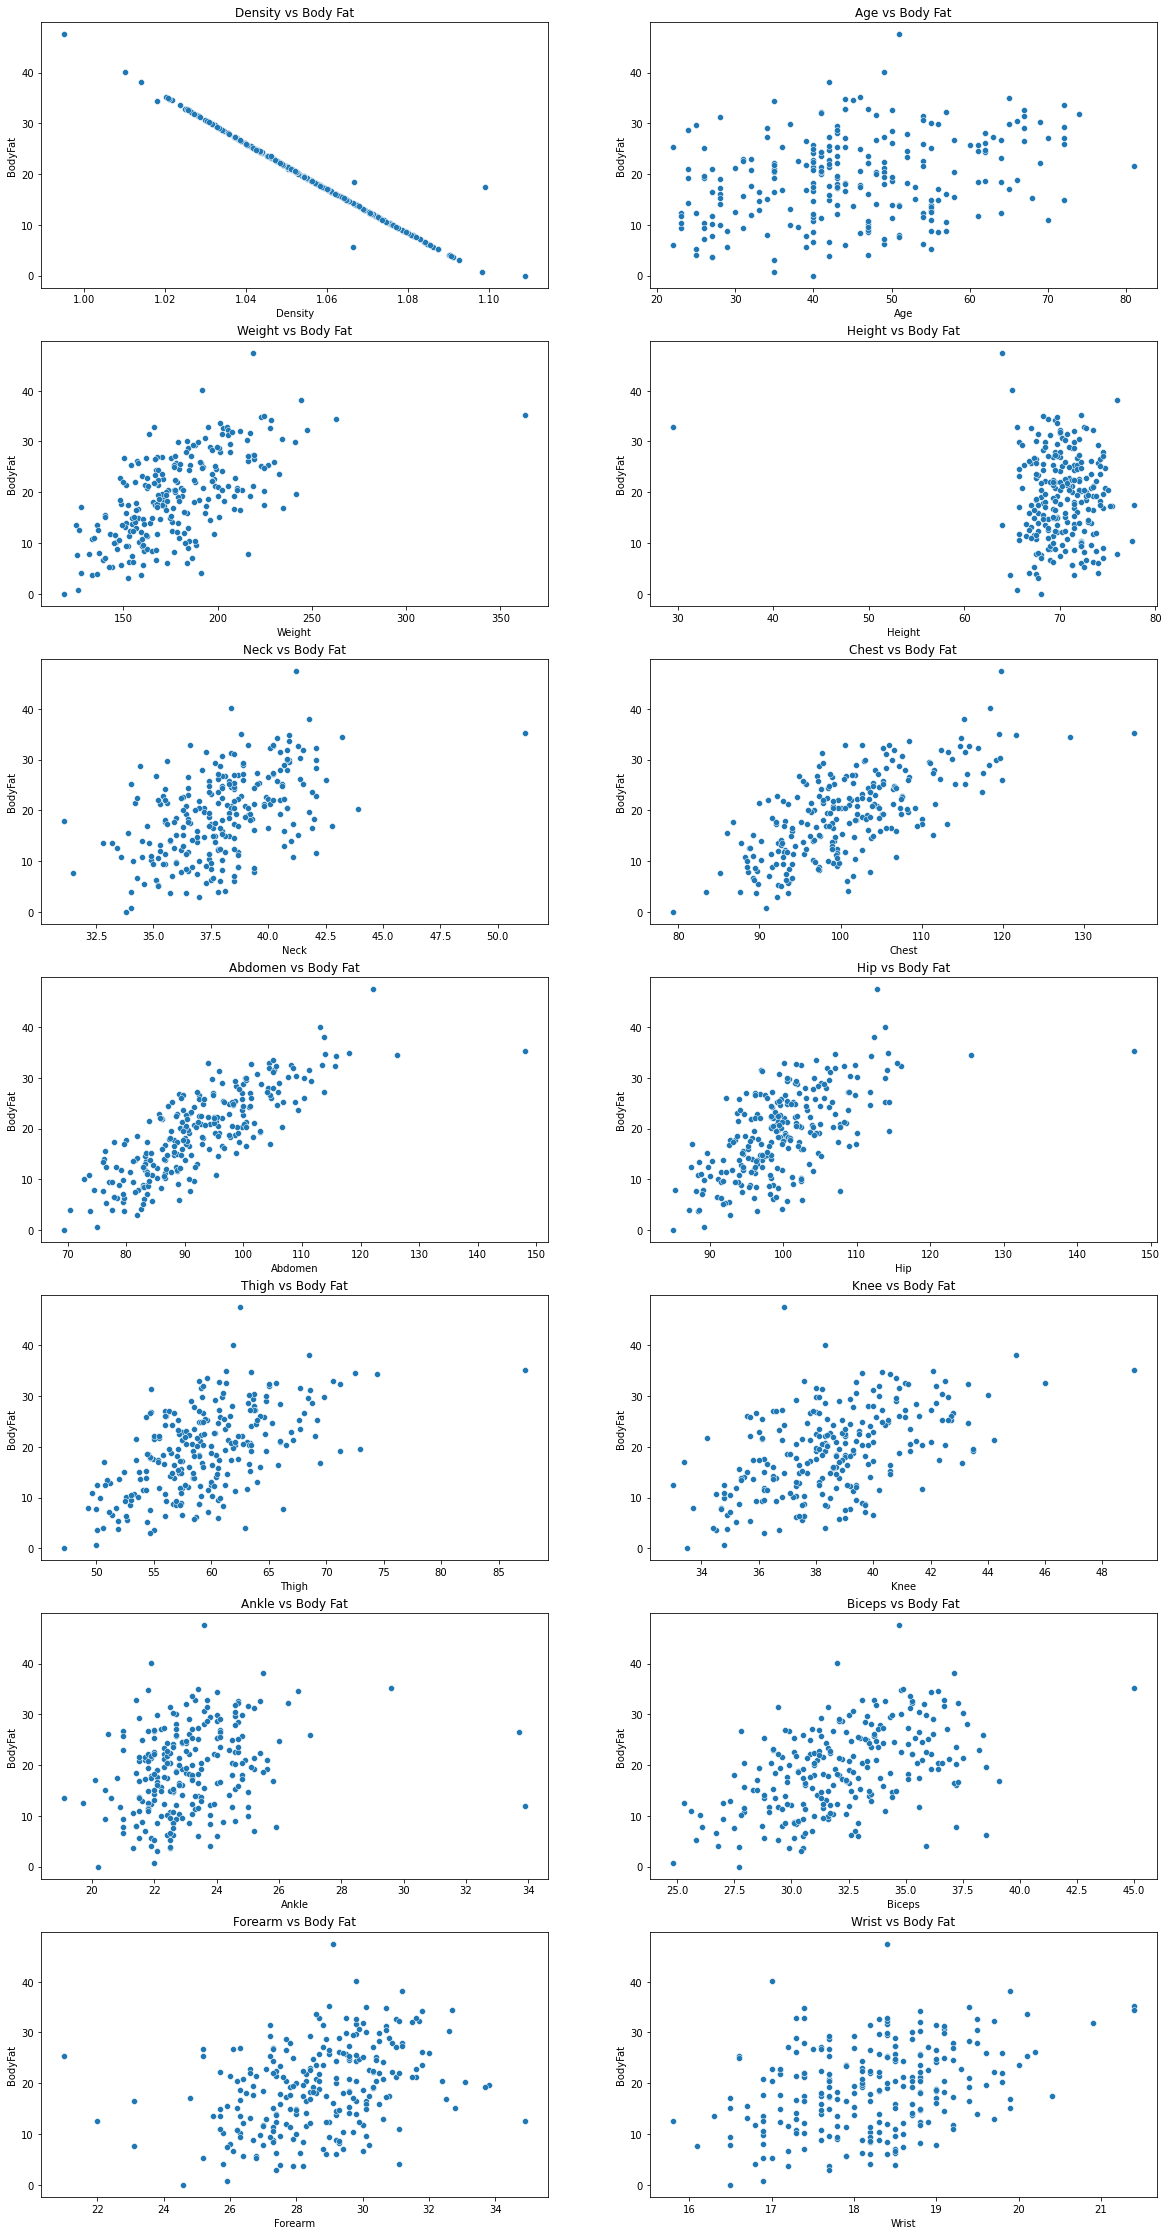

In [11]:
plt.figure(figsize=(20, 40)) 
plt.subplot(7, 2, 1)
sns.scatterplot(data=df,x='Density',y='BodyFat')
plt.title('Density vs Body Fat')
plt.subplot(7, 2, 2)
sns.scatterplot(data=df,x='Age',y='BodyFat')
plt.title('Age vs Body Fat')
plt.subplot(7, 2, 3)
sns.scatterplot(data=df,x='Weight',y='BodyFat')
plt.title('Weight vs Body Fat')
plt.subplot(7, 2, 4)
sns.scatterplot(data=df,x='Height',y='BodyFat')
plt.title('Height vs Body Fat')
plt.subplot(7, 2, 5)
sns.scatterplot(data=df,x='Neck',y='BodyFat')
plt.title('Neck vs Body Fat')
plt.subplot(7, 2, 6)
sns.scatterplot(data=df,x='Chest',y='BodyFat')
plt.title('Chest vs Body Fat')
plt.subplot(7, 2, 7)
sns.scatterplot(data=df,x='Abdomen',y='BodyFat')
plt.title('Abdomen vs Body Fat')
plt.subplot(7, 2, 8)
sns.scatterplot(data=df,x='Hip',y='BodyFat')
plt.title('Hip vs Body Fat')
plt.subplot(7, 2, 9)
sns.scatterplot(data=df,x='Thigh',y='BodyFat')
plt.title('Thigh vs Body Fat')
plt.subplot(7, 2, 10)
sns.scatterplot(data=df,x='Knee',y='BodyFat')
plt.title('Knee vs Body Fat')
plt.subplot(7, 2, 11)
sns.scatterplot(data=df,x='Ankle',y='BodyFat')
plt.title('Ankle vs Body Fat')
plt.subplot(7, 2, 12)
sns.scatterplot(data=df,x='Biceps',y='BodyFat')
plt.title('Biceps vs Body Fat')
plt.subplot(7, 2, 13)
sns.scatterplot(data=df,x='Forearm',y='BodyFat')
plt.title('Forearm vs Body Fat')
plt.subplot(7, 2, 14)
sns.scatterplot(data=df,x='Wrist',y='BodyFat')
plt.title('Wrist vs Body Fat')
plt.show()

#### Model Training

In [12]:
X = df.drop('BodyFat', axis=1)
Y = df['BodyFat']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
x_train.shape

(201, 14)

In [14]:
x_test.shape

(51, 14)

In [15]:
y_train.shape

(201,)

In [16]:
y_test.shape

(51,)

In [17]:
lrmodel = LinearRegression()
scores = cross_val_score(estimator=lrmodel, X=x_train, y=y_train, cv=10)
print("score :",scores.mean())

score : 0.9614712036327262


In [18]:
lrmodel.fit(x_train, y_train)

LinearRegression()

In [19]:
modelPredict = lrmodel.predict(x_test)
modelPredict

array([12.47599803, 26.67435388,  3.07959789, 20.63880962,  9.34847798,
       22.70861117, 25.03675869, 25.48102205, 25.93334391, 27.11154051,
       25.57241354, 15.98800692, 21.14640329, 20.83829164, 16.14317929,
       13.3040561 , 16.47678212,  0.78408468, 10.29343046, 11.81382892,
       20.81307832, 14.13571505, 29.36335333, 22.01066502, 19.55707409,
       32.09203249,  4.47080362, 23.01058488, 21.42742996, 28.16462336,
       30.67541777, 26.48394745, 27.80255825, 11.56748784, 35.79295812,
       13.64766366, 24.41298695, 21.21929569, 14.98985644, 11.3621322 ,
       17.7648297 , 20.98358534, 34.97587412, 22.24706119, 20.90945562,
       14.94307209, 13.01198496,  7.40626977, 31.73273885, -4.41584369,
        8.95893169])

In [20]:
meanSqError = mean_squared_error(y_test, modelPredict)
meanSqError

0.5762546808927881

In [21]:
rootMSE = np.sqrt(meanSqError)
rootMSE

0.7591144056680706

In [22]:
print("coef:",lrmodel.coef_)
print("intercept:",lrmodel.intercept_)

coef: [-4.11024678e+02  1.52381156e-02  5.79140094e-03  2.54264651e-03
 -3.60408307e-02  4.80507876e-02  1.17008579e-02  1.99096134e-02
  1.26136693e-02 -4.72323642e-03 -9.21572529e-02 -8.31697291e-02
  5.91102146e-02  1.94368776e-02]
intercept: 446.757533438347
